# M2 ASSIGNMENT 3

## Binary Logistic Regression

## BACKGROUND:
This is Data for a Study of Risk Factors Associated with Low Infant Birth Weight. Data were collected at Baystate Medical Center, Springfield, Massachusetts, during 1986.
Description of variables:
* **LOW** – Low Birth Weight (0 means Not low and 1 means low)
* **AGE** - Age of the Mother in Years
* **LWT** - Weight in Pounds at the Last Menstrual Period
* **RACE** - Race (1 = White, 2 = Black, 3 = Other)
* **SMOKE** - Smoking Status During Pregnancy (1 = Yes, 0 = No)
* **PTL** - History of Premature Labor (0 = None, 1 = One, etc.)
* **HT** - History of Hypertension (1 = Yes, 0 = No)
* **UI** - Presence of Uterine Irritability (1 = Yes, 0 = No)
* **FTV** - Number of Physician Visits During the First Trimester (0 = None, 1 = One, 2 = Two, etc.)

 Consider *LOW* as dependent variable and remaining variables listed above as independent variables.

## QUESTIONS
1. Import BIRTH WEIGHT data.
2. Cross tabulate dependent variable with each independent variable.
3. Develop a model to predict if birth weight is low or not using the given variables.
4. Generate three classification tables with cut-off values 0.4, 0.3 and 0.55.
5. Calculate sensitivity and specificity and misclassification rate for all three tables above. What is the recommended cut-off value?
6. Obtain ROC curve and report area under curve.

In [320]:
import pandas as pd

df = pd.read_csv("BIRTH WEIGHT.csv")
df.head()

,SR NO,ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT
0,1,85,0,19,182,2,0,0,0,0,0,2523
1,2,86,0,33,155,3,0,0,0,0,3,2551
2,3,87,0,20,105,1,1,0,0,0,1,2557
3,4,88,0,21,108,1,1,0,0,1,2,2594
4,5,89,0,18,107,1,1,0,0,1,0,2600


In [321]:
df.describe()

,SR NO,ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,95.000000,121.079365,0.312169,23.238095,129.814815,1.846561,0.391534,0.195767,0.063492,0.142857,0.793651,2944.656085
std,54.703748,63.303634,0.464609,5.298678,30.579380,0.918342,0.489390,0.493342,0.244494,0.350857,1.059286,729.022417
min,1.000000,4.000000,0.000000,14.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.000000
25%,48.000000,68.000000,0.000000,19.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2414.000000
50%,95.000000,123.000000,0.000000,23.000000,121.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2977.000000
75%,142.000000,176.000000,1.000000,26.000000,140.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3475.000000
max,189.000000,226.000000,1.000000,45.000000,250.000000,3.000000,1.000000,3.000000,1.000000,1.000000,6.000000,4990.000000


In [322]:
df['RACE'] = df['RACE'].map({1: 'WHITE', 2: 'BLACK', 3: 'OTHER'}).astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   SR NO   189 non-null    int64   
 1   ID      189 non-null    int64   
 2   LOW     189 non-null    int64   
 3   AGE     189 non-null    int64   
 4   LWT     189 non-null    int64   
 5   RACE    189 non-null    category
 6   SMOKE   189 non-null    int64   
 7   PTL     189 non-null    int64   
 8   HT      189 non-null    int64   
 9   UI      189 non-null    int64   
 10  FTV     189 non-null    int64   
 11  BWT     189 non-null    int64   
dtypes: category(1), int64(11)
memory usage: 16.7 KB


In [323]:
df.isna().sum()

SR NO    0
ID       0
LOW      0
AGE      0
LWT      0
RACE     0
SMOKE    0
PTL      0
HT       0
UI       0
FTV      0
BWT      0
dtype: int64

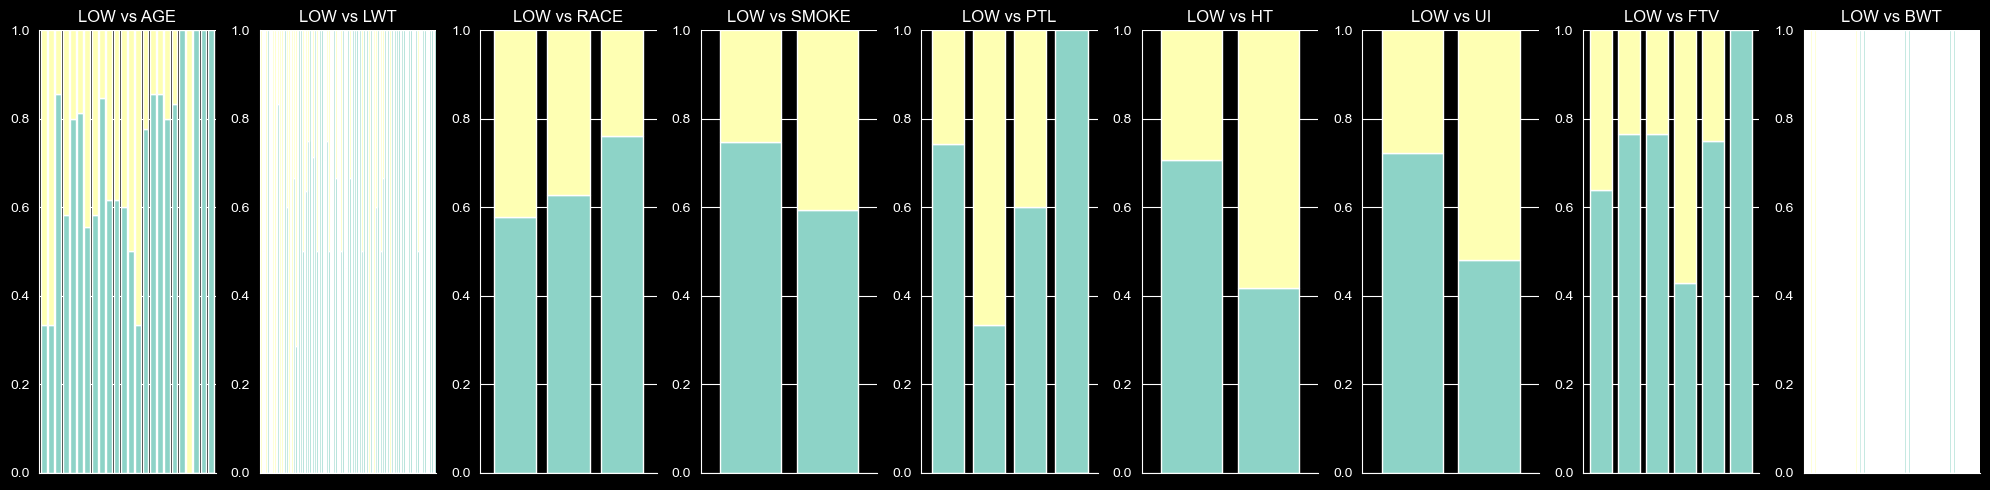

In [324]:
import matplotlib.pyplot as plt

vars_to_plot = df.columns.drop(['SR NO', 'ID', 'LOW']) # those columns are not useful for analysis

fig, axes = plt.subplots(nrows=1, ncols=len(vars_to_plot), figsize=(20, 5))

for i, var in enumerate(vars_to_plot):
    ct_pct = pd.crosstab(df[var], df['LOW'], normalize='index')
    ct_pct.plot(kind='bar', stacked=True, ax=axes[i], width=0.8)

    axes[i].set_title(f'LOW vs {var}')
    axes[i].set_xlabel('')
    axes[i].set_xticklabels([])
    axes[i].set_ylim(0, 1)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].get_legend().remove()

plt.tight_layout()
plt.show()

Taking a careful look into the graphs, specially `LOW` vs `BWT` we indentify that there is an almost deterministic threshold in birth weight below which infants are classified as “low birth weight” (`LOW` = 1) and above which they are classified as “normal weight” (`LOW` = 0). In other words, LOW is not an independent variable: it is essentially a discretized version of `BWT`. Because of this near-perfect separation, including `BWT` as an independent variable in a logistic regression model with `LOW` as the dependent variable leads to numerical problems (singular matrix / perfect separation). To model risk factors, `BWT` is therefore not used as a predictor, and `LOW` is modeled instead as a function of other variables (`AGE`, `LWT`, `RACE`, `SMOKE`, `PTL`, `HT`, `UI`, `FTV`).

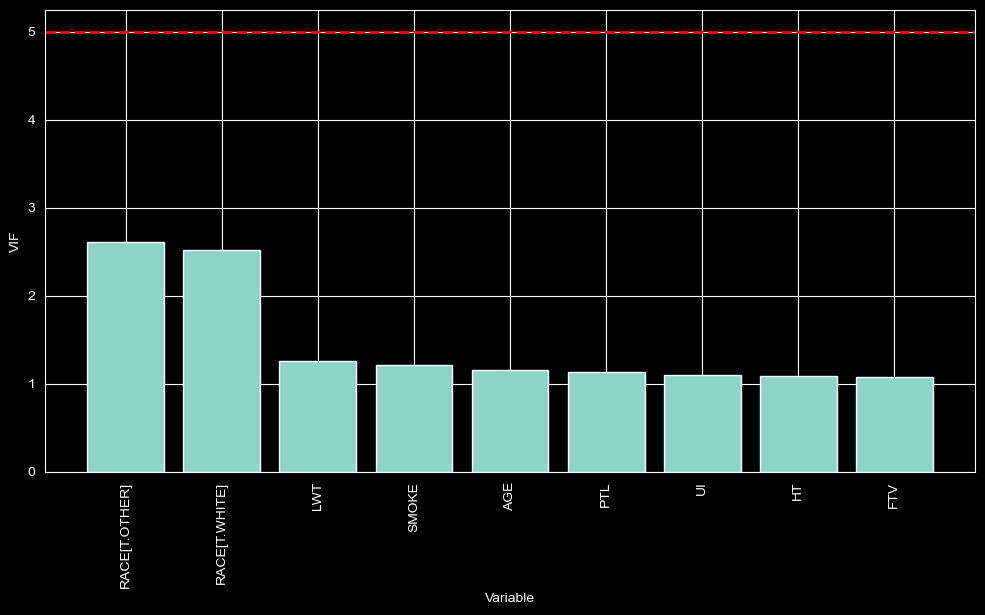

In [325]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_multicollinearity(expression):
    y, x = dmatrices(expression, data=df, return_type='dataframe')
    vif_data = pd.DataFrame()
    vif_data['Variable'] = x.columns
    vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif_data = vif_data[vif_data['Variable'] != 'Intercept'].sort_values('VIF', ascending=False)
    return vif_data

def plot_vif(vif_data):
    plt.figure(figsize=(12, 6))
    plt.axhline(y=5, color='red', linestyle='--', linewidth=2)
    plt.bar(vif_data['Variable'], vif_data['VIF'])
    plt.xlabel('Variable')
    plt.ylabel('VIF')
    plt.xticks(rotation=90)
    plt.show()

expression_full = 'LOW ~ AGE + LWT + RACE + SMOKE + PTL + HT + UI + FTV'
plot_vif(check_multicollinearity(expression_full))

Regarding VIFs there is no multicolinearitty apparently that we have to care about.

In [326]:
import statsmodels.formula.api as smf

riskmodel = smf.logit(formula='LOW ~ AGE + LWT + RACE + SMOKE + PTL + HT + UI + FTV', data=df).fit()
riskmodel.summary()

Optimization terminated successfully.
         Current function value: 0.531508
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    LOW   No. Observations:                  189
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            9
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                  0.1439
Time:                        15:14:52   Log-Likelihood:                -100.45
converged:                       True   LL-Null:                       -117.34
Covariance Type:            nonrobust   LLR p-value:                 9.832e-05
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7364      1.254      1.385      0.166      -0.722       4.194
RACE[T.OTHER]    -0.4169      0.539     -0.773      0.439      -1.474       0.640
RACE[T.WHITE]    -1.2935      0.528     -2.448      0.014      -2.329      -0.258
AGE              -0.0298      0.037     -0.804      0.421      -0.102       0.043
LWT              -0.0151      0.007     -2.178      0.029      -0.029      -0.002
SMOKE             0.9304      0.402      2.312      0.021       0.142       1.719
PTL               0.5355      0.346      1.549      0.121      -0.142       1.213
HT                1.8548      0.696      2.666      0.008       0.491       3.218
UI                0.8310      0.467      1.780      0.075      -0.084       1.746
FTV               0.0620      0.172      0.360      0.719      -0.276       0.400
=================================================================================
"""

Regarding `RACE` there is a good difference between white and black, but not a big difference between black and other. To make `RACE` more clear we are going to join other and black in one pool (0), and compare with white (1) (`IS_WHITE`).
Also, we are going to remove `FTV` and `AGE` since they are too far from 5% ($p > 0.05$), and check how model behaves.

In [327]:
df['IS_WHITE'] = (df['RACE'] == 'WHITE').astype(int)

riskmodel_refined = smf.logit(formula='LOW ~ LWT + IS_WHITE + SMOKE + PTL + HT + UI', data=df).fit()
riskmodel_refined.summary()

Optimization terminated successfully.
         Current function value: 0.535223
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    LOW   No. Observations:                  189
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            6
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                  0.1379
Time:                        15:14:52   Log-Likelihood:                -101.16
converged:                       True   LL-Null:                       -117.34
Covariance Type:            nonrobust   LLR p-value:                 1.393e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6835      0.851      0.803      0.422      -0.985       2.352
LWT           -0.0140      0.007     -2.144      0.032      -0.027      -0.001
IS_WHITE      -1.0543      0.391     -2.699      0.007      -1.820      -0.289
SMOKE          0.9961      0.393      2.537      0.011       0.226       1.766
PTL            0.4869      0.342      1.425      0.154      -0.183       1.157
HT             1.8293      0.691      2.646      0.008       0.474       3.184
UI             0.8233      0.466      1.766      0.077      -0.091       1.737
==============================================================================
"""

`PTL` and `UI` are still with high values on p, we could remove them from the model as well, since they are no contruting.

In [328]:
expression_refined = 'LOW ~ LWT + IS_WHITE + SMOKE + HT'
riskmodel_refined = smf.logit(formula=expression_refined, data=df).fit()
riskmodel_refined.summary()

Optimization terminated successfully.
         Current function value: 0.552004
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    LOW   No. Observations:                  189
Model:                          Logit   Df Residuals:                      184
Method:                           MLE   Df Model:                            4
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                  0.1109
Time:                        15:14:52   Log-Likelihood:                -104.33
converged:                       True   LL-Null:                       -117.34
Covariance Type:            nonrobust   LLR p-value:                 3.143e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2312      0.825      1.493      0.136      -0.385       2.848
LWT           -0.0167      0.006     -2.576      0.010      -0.029      -0.004
IS_WHITE      -1.0599      0.383     -2.769      0.006      -1.810      -0.310
SMOKE          1.1176      0.382      2.929      0.003       0.370       1.866
HT             1.7402      0.689      2.524      0.012       0.389       3.091
==============================================================================
"""

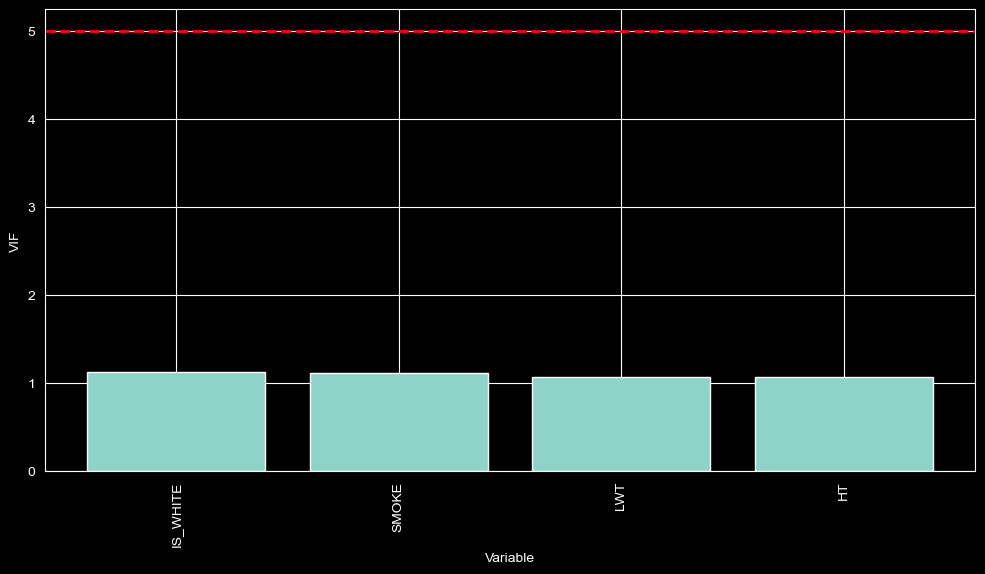

In [329]:
plot_vif(check_multicollinearity(expression_refined))

* `LWT` (Weight in Pounds at the Last Menstrual Period): $\beta = -0.0167$ and $p = 0.01 < 0.05$ - higher maternal weight is associated with a lower risk of low birth weight (lower mother weight bigger the risk of low birth weight).
* `IS_WHITE` (RACE of the baby is white): $\beta = -1.0599$ and $p = 0.006 << 0.05$ - white mothers are less likely to have low birth weight.
* `SMOKE` (Smoking Status During Pregnancy): $\beta = 1.1176$ and $p = 0.003 << 0.05$ - smokers are more likely to have low birth weight.
* `HT` (History of Hypertension): $\beta = 1.7402$ and $p = 0.012 < 0.05$ - hypertension contributes to a higher risk of low birth weight.

In [330]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df['prediction'] = riskmodel_refined.predict()

def calculate_prediction(name, threshold):
    df[name] = np.where(df['prediction'] >= threshold, 1, 0)
    cm = confusion_matrix(df['LOW'], df[name])
    tn = cm[0, 0] # true negatives
    fp = cm[0, 1] # false positives
    fn = cm[1, 0] # false negatives
    tp = cm[1, 1] # true positives
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    misclassification_rate = (fp + fn) / (tn + fp + fn + tp)

    print('Sensitivity : ', sensitivity.round(3))
    print('Specificity : ', specificity.round(3))
    print('Misclassification rate : ', misclassification_rate.round(3))
    print('-' * 30)
    print(classification_report(df['LOW'], df[name]))

calculate_prediction('prediction03', 0.3)
calculate_prediction('prediction04', 0.4)
calculate_prediction('prediction055', 0.55)

Sensitivity :  0.712
Specificity :  0.538
Misclassification rate :  0.407
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.54      0.65       130
           1       0.41      0.71      0.52        59

    accuracy                           0.59       189
   macro avg       0.61      0.63      0.58       189
weighted avg       0.68      0.59      0.61       189

Sensitivity :  0.39
Specificity :  0.846
Misclassification rate :  0.296
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       130
           1       0.53      0.39      0.45        59

    accuracy                           0.70       189
   macro avg       0.64      0.62      0.62       189
weighted avg       0.69      0.70      0.69       189

Sensitivity :  0.254
Specificity :  0.946
Misclassification rate :  0.27
------------------------------
              precision    recall

The cut-off of 0.3 gives us a better sensitivity at the cost of an increase in misclassification.
On the other hand, 0.55 reduces the misclassification rate, but has the worst sensitivity.
The 0.4 cut-off reduces misclassification and keeps sensitivity at a reasonable level. I would prefer 0.4 over 0.55 as a compromise.
However, since we are dealing with a health context and babies at risk of low birth weight (a potential life-threatening condition), I choose 0.3 as the recommended cut-off, because it maximizes sensitivity and reduces the chance of missing true low birth weight cases.

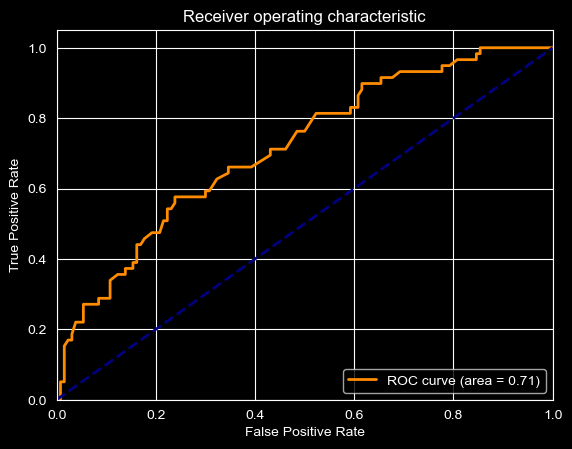

Area under the ROC curve : 0.714146


In [331]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(df['LOW'], df['prediction'])
ruc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % ruc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]);plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under the ROC curve : %f" % ruc_auc)